In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [163]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/ULTRACEMCO.csv")

In [164]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-24,ULTRACEMCO,EQ,10.00,305.00,340.00,253.25,259.00,260.20,268.80,6633956,1.783237e+14,NaN,970249,0.1463
1,2004-08-25,ULTRACEMCO,EQ,260.20,262.00,264.70,249.20,255.00,255.55,255.54,2794161,7.140107e+13,NaN,584835,0.2093
2,2004-08-26,ULTRACEMCO,EQ,255.55,257.75,272.50,256.00,270.10,270.70,267.00,2340926,6.250231e+13,NaN,443707,0.1895
3,2004-08-27,ULTRACEMCO,EQ,270.70,272.00,272.55,260.65,261.35,262.25,264.40,915106,2.419529e+13,NaN,222763,0.2434
4,2004-08-30,ULTRACEMCO,EQ,262.25,263.70,269.00,262.05,267.00,266.10,265.38,387417,1.028108e+13,NaN,84031,0.2169


In [165]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4140 non-null   object 
 1   Symbol              4140 non-null   object 
 2   Series              4140 non-null   object 
 3   Prev Close          4140 non-null   float64
 4   Open                4140 non-null   float64
 5   High                4140 non-null   float64
 6   Low                 4140 non-null   float64
 7   Last                4140 non-null   float64
 8   Close               4140 non-null   float64
 9   VWAP                4140 non-null   float64
 10  Volume              4140 non-null   int64  
 11  Turnover            4140 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4140 non-null   int64  
 14  %Deliverble         4140 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 485.3

In [166]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4.140000e+03,4.140000e+03,2456.000000,4.140000e+03,4140.000000
mean,2149.412331,2152.617633,2182.208889,2121.329191,2150.547174,2150.926570,2151.959976,2.476179e+05,7.259128e+13,26078.000407,1.390155e+05,0.601918
std,1523.672869,1526.122210,1542.575320,1508.295746,1524.576526,1524.660937,1525.636357,3.793894e+05,1.221163e+14,21219.302379,2.675854e+05,0.165380
min,10.000000,256.000000,262.150000,245.250000,253.000000,255.550000,255.540000,4.020000e+02,2.615271e+10,97.000000,4.020000e+02,0.097100
25%,847.812500,848.987500,864.975000,830.000000,849.000000,848.700000,848.110000,8.101775e+04,6.545025e+12,12156.000000,4.799650e+04,0.492775
50%,1740.100000,1749.975000,1767.000000,1720.200000,1742.000000,1742.175000,1744.315000,1.687580e+05,2.815186e+13,20725.000000,9.836150e+04,0.615000
75%,3679.162500,3676.350000,3729.287500,3631.637500,3683.837500,3680.837500,3682.930000,3.038030e+05,9.110827e+13,33559.500000,1.753795e+05,0.718600
max,6971.250000,7040.000000,7055.950000,6840.000000,7040.000000,6971.250000,6905.460000,1.573858e+07,1.850766e+15,229469.000000,1.431144e+07,1.000000


In [167]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [168]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [169]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [170]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [171]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [172]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [173]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
4135,2.974023,2.350044,6275.90,697792,NaN
4136,1.778669,0.761268,6326.80,512910,NaN
4137,1.990446,0.012579,6360.80,414435,NaN
4138,2.007784,-0.584891,6382.45,406869,NaN
4139,3.055241,-1.583856,6278.95,475175,NaN


In [174]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [175]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [176]:
#Define the prediction model
model = RandomForestRegressor()

In [177]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [178]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9807010509345552


In [179]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [180]:
predictions = model.predict(X_Check)

In [181]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

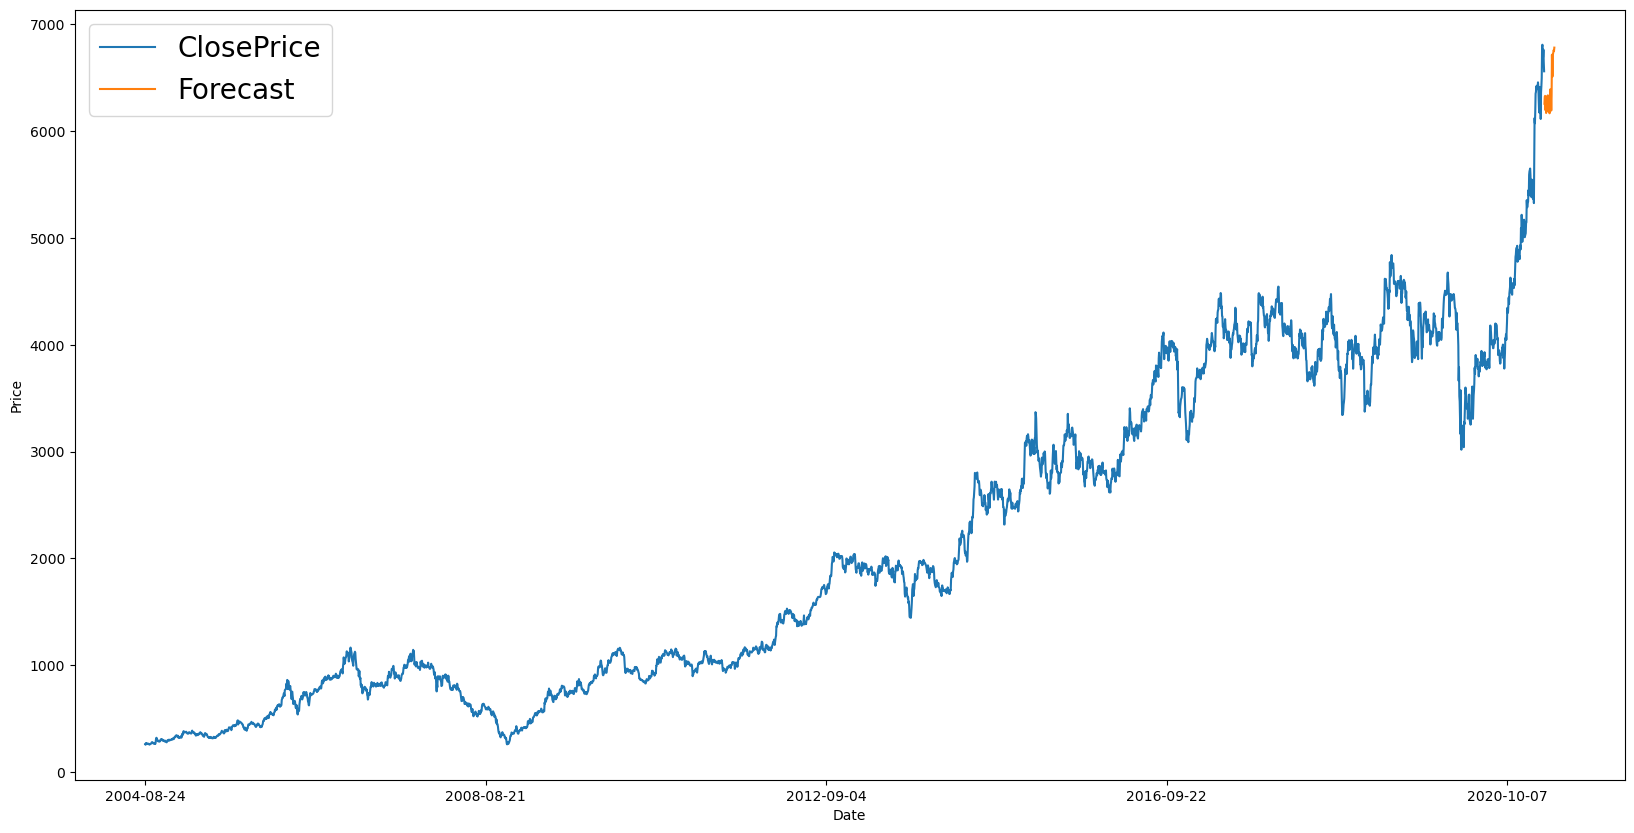

In [182]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')